In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("Linear transforms.ipynb")

# Matrix Analysis 2024 - EE312
## Week 2  - Linear transforms
[N. Aspert](https://people.epfl.ch/nicolas.aspert) - [LTS2](https://lts2.epfl.ch)

The first week notebook (introduction to Python, Numpy and Matplotlib) can be used as a help.

## Important
You need to submit *individually* your answers on moodle before the next exercise session. For the theoretical questions you can either fill the notebook or write it on a separate sheet (if you are not comfortable with Markdown/TeX) and upload a scanned version. 

## Objective

The end goal is to understand purely algebraic, matrix based, view of a few linear transforms. You will use those linear transform to perform some basic time-frequency analysis of signals.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Part I - Fourier

<!-- BEGIN QUESTION -->

1. Prove that any set of orthogonal vectors $v_i \in \mathbb{C}^N, \, i=1, \ldots , M \leq N$ such that $v_i^H v_j = C \delta_{i,j}$ is linearly independent (where $C$ is some constant).

We have a set of orthogonal vectors $v_i \in \mathbb{C}^N,$  with $i=1, \ldots , M \leq N$.\
Therefore, $v_i^H v_j = C \delta_{i,j} =\left\{\begin{matrix}
 C,& if & i=j\\ 
 0,& if & i\neq j
\end{matrix}\right.$.<br/>

We want to prove that the set is linearly independent, in other words that we have, with $c_{i}$ some scalar, \
$\sum_{j = 1}^{N} c_{j}.v_{j} = 0 \Leftrightarrow c_{j} = 0$.<br/><br/><br/>
Let's start, we can write:\
$v_{i}^H. (\sum_{j = 1}^{N}c_{j}.v_{j}) = v_{i}.0 = 0$<br/><br/>
Therefore,\
$0 = v_{i}^H. (\sum_{j = 1}^{N}c_{j}.v_{j}) =\sum_{j = 1}^{N}c_{j}.v_{j}.v_{i}^H$<br/><br/>
Yet, the set of vectors $v_i$ is orthogonal, $v_i^H v_j = C \delta_{i,j}$. So, all the terms of the sum are equal to zero except for the one where $i=j$:<br/>
$0 =\sum_{j = 1}^{N}c_{j}.v_{j}.v_{i}^H = 0 + c_{i}.v_{i}.v_{i}^H = c_{i}.v_{i}.v_{i}^H$.\
$0 = c_{i}.v_{i}.v_{i}^H$.<br/><br/>
Nonetheless, we know that $v_{i}$ is a non-zero vector, $v_{i}.v_{i}^H =C$. Hence, we can deduce:\
$0 = c_{i}.v_{i}.v_{i}^H$ *if and only if* $c_{i} = 0$<br/><br/>
This reasonning works for all $i=1, \ldots , M \leq N$.<br/><br/>

We can conclude that:\
$\sum_{j = 1}^{N} c_{j}.v_{j} = 0 \Leftrightarrow c_{j} = 0$.<br/>
**The set of orthogonal vectors is linearly independent.**

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

2. Compute $a_r = \sum_{n=0}^{N-1}e^{j2\pi r\frac{n}{N}}$, where $r$ is an integer (discuss the result depending on the value of $r$).

If $r\equiv 0 \mod N$, then $e^{j2\pi r\frac{n}{N}}=1$, and $a_r = \sum_{n = 0}^{N-1} 1 = N$.


If $r\not\equiv 0 \mod N$, this is the sum of a geometric series $a_r = \sum_{n = 0}^{N-1} b^{n} = \frac{1 - b^N}{1 - b}$, with $b=e^{\frac{2jr\pi}{N}}$.
Since $b^N = e^{2jr\pi} = 1$, we then have $a_r = 0$.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

3. Let $v_k \in \mathbb{C}^N$ be such that $v_k[n] = e^{-j 2 \pi \frac{kn}{N}}$, for $k,n = 0, \ldots , N-1$. 
- Prove that these vectors are mutually orthogonal, hence linearly independent. 
- Compute the norm of $v_k$.

$v_{k}$ has the form $\begin{pmatrix}
e^{0}\\ 
e^{-j 2 \pi \frac{k}{N}}\\ 
...\\ 
e^{-j 2 \pi \frac{kN-1}{N}}
\end{pmatrix}$, for $k,n = 0, \ldots , N-1$.<br/><br/>

As we mentioned in the previous question, to prove that vectors are mutually orthogonal, we need to demonstrate that $v_k^H v_l = C \delta_{k,l}$, with $C$ some constant.<br/><br/>

$v_k^H v_l = \sum_{n = 0}^{N-1} v_{k}[n]^H .v_l[n]$,&nbsp; with $k,l,n = 0, \ldots , N-1$. &nbsp;&nbsp;&nbsp; (simple rule of matrix multiplication)<br/><br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $= \sum_{n = 0}^{N-1} e^{j2\pi k\frac{n}{N}}.e^{-j2\pi l\frac{n}{N}} $<br/>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $= \sum_{n = 0}^{N-1} e^{j2\pi \frac{n}{N}(k-l)}$<br/>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $= \sum_{n = 0}^{N-1} e^{j2\pi \frac{n}{N}r}$, &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; if we define $r=k-l$.<br/><br/>

Using the result of question 2, $v_k^H v_l = 0$ for $k\neq l$. 

For $r = 0$, question2 shows that $v_k^H v_l = N$ for $k = l$.<br/><br/>


We can conclude with:<br/>
$v_k \in \mathbb{C}^N$ such as $v_k[n] = e^{-j 2 \pi \frac{kn}{N}}$, for $k,n = 0, \ldots , N-1$ give us:<br/>
$v_k^H v_l = N \delta_{k,l}$.


**The vectors are mutually orthogonal, hence linear independent.**

From the above result we have $v_k^Hv_k = N = \|v_k\|^2$, and therefore $\|v_k\| = \sqrt{N}$.

<!-- END QUESTION -->

4. Implement the function `get_fourier_matrix` that returns a normalized Fourier matrix of size $N\times N$. Do not make use of the builtin DFT/FFT functions in `numpy` or `scipy`. Raise a `ValueError` exception if a ngetive or zero $N$ value is supplied.

In [3]:
def get_fourier_matrix(N):
    # BEGIN SOLUTION
    if N <= 0:
        raise ValueError("Invalid size")
    k = np.arange(0, N)
    Ws = np.exp(-2j*np.pi*np.outer(k, k)/N)
    return Ws/np.sqrt(N)
    # END SOLUTION

In [4]:
grader.check("q4")

q4 results: All test cases passed!
q4 - 1 message: Good, your implementation returns correct results
q4 - 2 message: Good, you did not use the scipy.linalg.dft function
q4 - 3 message: Good, you did not use the scipy.fft.fft function
q4 - 4 message: Good, you did not use the numpy.fft.fft function
q4 - 5 message: Good, your implementation returns an orthogonal matrix
q4 - 6 message: Good, you properly validated size before computing the result

Let us now generate two test signals. 

The first one $x_1(t)$ is made of four piecewise sinusoids, of different frequencies:

$$
x_1(t) = \cos(2\pi 5t), 0\le t < 2\\
x_1(t) = \cos(2\pi 10t), 2\le t < 4\\
x_1(t) = \cos(2\pi 25t), 4\le t < 6\\
x_1(t) = \cos(2\pi 50t), 6\le t < 8\\
$$


In [5]:
Fs = 256 # sampling frequency
t = np.arange(0, Fs*8)/Fs
x1 = np.zeros(Fs*8)
x1[0:Fs*2] = np.cos(2*np.pi*5*t[0:Fs*2])
x1[Fs*2:Fs*4] = np.cos(2*np.pi*10*t[Fs*2:Fs*4])
x1[Fs*4:Fs*6] = np.cos(2*np.pi*25*t[Fs*4:Fs*6])
x1[Fs*6:Fs*8] = np.cos(2*np.pi*50*t[Fs*6:Fs*8])

The second signal $x_2(t)$ is the sum of the same sinusoids over the complete time interval, with a scaling term s.t. the amplitude of both signals is identical.

In [6]:
x2 = 0.25*(np.cos(2*np.pi*5*t) + np.cos(2*np.pi*10*t) + np.cos(2*np.pi*25*t) + np.cos(2*np.pi*50*t))

<!-- BEGIN QUESTION -->

5. 
- Display the generated signals using `plt.plot`. 
- Compute their Fourier transforms using the Fourier matrix generate at the previous question.
- Display the amplitude of their Fourier spectrum. What do you observe ? 

_Type your answer here, replacing this text._

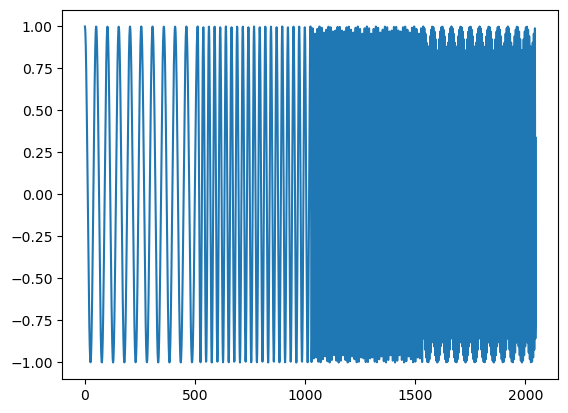

In [7]:
# plot x1
# BEGIN SOLUTION
plt.plot(x1)
# END SOLUTION

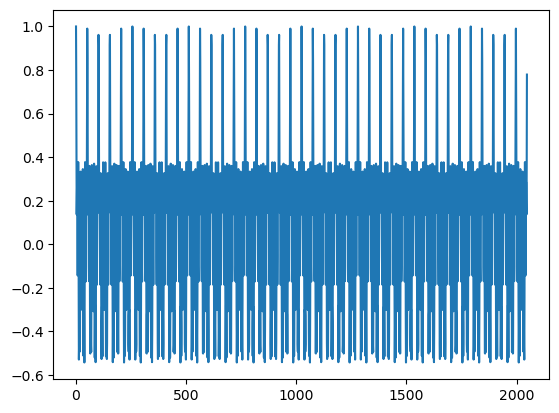

In [8]:
# plot x2
# BEGIN SOLUTION
plt.plot(x2)
# END SOLUTION

In [9]:
# Compute the Fourier transform of x1 and x2
# BEGIN SOLUTION
W = get_fourier_matrix(len(x1))
xf1 = W@x1
xf2 = W@x2
# END SOLUTION

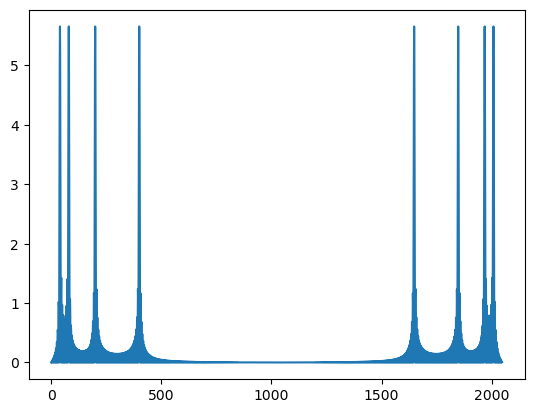

In [10]:
# Plot the spectrum of x1
# BEGIN SOLUTION
plt.plot(np.abs(xf1))
# END SOLUTION

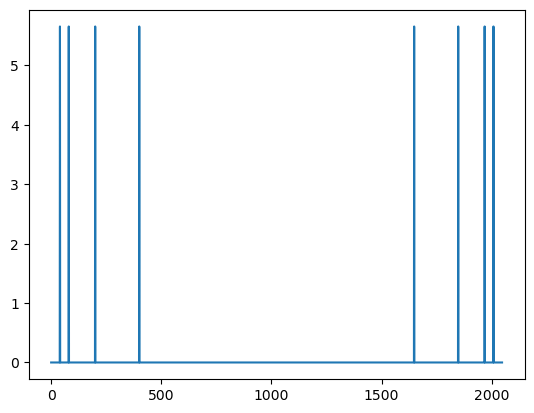

In [11]:
# Plot the spectrum of x2
# BEGIN SOLUTION
plt.plot(np.abs(xf2))
# END SOLUTION

Despite having $x_1$ and $x_2$ being quite different signals, we notice that the amplitude of their Fourier transform is very similar. The Fourier transform of $x_1$ exhibit more ripples around the peaks due to discontinuites, but both show four symmetrical peaks at the frequencies of the 4 sinusoids composing the signals. While the input signals can be reconstructed from their Fourier transform, these representations are not very well suited, as they give precise informations about the frequencies present in both signals, but no information about their location in time.

<!-- END QUESTION -->

In order to have a better compromise between time and frequency, the input signal will be split in smaller non-overlapping blocks of length $p$, and we will perform the DFT of each block.

6. Using the `get_fourier_matrix` implemented previously, fill the `get_block_dft_matrix` function below s.t. it returns a $N\times N$ matrix that will perform the block Fourier transform when applied to an input vector. Raise a `ValueError` if $p$ does not divide $N$.

Hint: [numpy.pad](https://numpy.org/doc/stable/reference/generated/numpy.pad.html#numpy.pad) and/or [numpy.kron](https://numpy.org/doc/stable/reference/generated/numpy.kron.html) might prove useful.

In [12]:
def get_block_dft_matrix(N, p):
    # BEGIN SOLUTION
    if N % p != 0:
        raise ValueError("Incorrect size")
    return np.kron(np.eye(N//p), get_fourier_matrix(p))
    # END SOLUTION

In [13]:
grader.check("q6")

q6 results: All test cases passed!
q6 - 1 message: Good, your implementation returns an orthogonal matrix
q6 - 2 message: Good, you properly validated size before computing the result
q6 - 3 message: Good, your implementation returns the correct result

<!-- BEGIN QUESTION -->

We will now use this block Fourier transform to how the frequencies of the signal evolve through time.

7. 
- Using the `reshape` and `plt.imshow` functions, display the amplitude of the result of the block Fourier transform of $x_1$ and $x_2$. Is the result improved when compared to the one observed in question 5 ?
- What is the influence of parameter $p$ ? 


_Type your answer here, replacing this text._

In [14]:
# Compute the block DFT matrix Wb
# BEGIN SOLUTION
p = 64
Wb = get_block_dft_matrix(len(x1), p)
# END SOLUTION

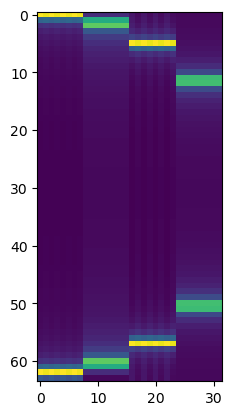

In [15]:
# Plot the block DFT of x1
# BEGIN SOLUTION
plt.imshow(np.rot90(np.abs(Wb@x1).reshape(len(x1)//p, p)))
# END SOLUTION

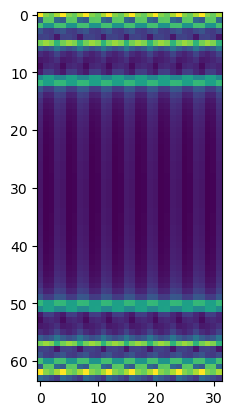

In [16]:
# Plot the block DFT of x2
# BEGIN SOLUTION
plt.imshow(np.rot90(np.abs(Wb@x2).reshape(len(x2)//p, p)))
# END SOLUTION

We now have a better idea of how the frequencies present in the signals evolve through time. It is more obvious that $x_1$ contains a sequence of sinusoids and $x_2$ a superposition of sinusoids. 

However, the limitation is that parameter $p$ controls the frequency resolution. If we chose a value of $p$ too small, the frequency resolution is poor, and if we chose a $p$ too big, the time resolution will be in turn bad. So while we improve the time-frequency display, there is a tradeoff to be made between time and frequency resolutions, as both cannot be simultaneously high.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

8. In a real-world application, would generating a $N\times N$ matrix to perform the block Fourier transform be a good way to implement it ? (Justify)

In a real-world application, the matrix as we implemented it is a poor choice. As the blocks that compose it are identical, it would be much more efficient to apply the smaller block Fourier matrix directly to the chunks of the input signals.

<!-- END QUESTION -->

## Part II - Haar transform

In this part we will study another approach to study the time/frequency properties of signals. 

Let us consider a vector $x\in\mathbb{R}^N$, with $N$ being even. The single-level Haar transform decomposes $x$ into two vectors $a^1$ and $d^1$ belonging to $\mathbb{R}^{\frac{N}{2}}$. 

The coefficients of $a^1$ are defined as follows: $a^1_n = \frac{1}{\sqrt{2}}(x_{2n-1} + x_{2n}), n=1, ..., \frac{N}{2}$. $a^1$ is referred to as the *average coefficients vector*.

The coefficients of $d^1$ are defined as follows: $d^1_n = \frac{1}{\sqrt{2}}(x_{2n-1} - x_{2n}), n=1, ..., \frac{N}{2}$. $d^1$ is referred to as the *detail coefficients vector*.


<!-- BEGIN QUESTION -->

9. Let us represent the single-level Haar transform by a matrix $H_1$ s.t. 
$$
H_1 x = \begin{pmatrix}a^1 \\ d^1\end{pmatrix}
$$
Prove that $H_1$ is orthonormal.

In order to check that $H_1H_1^T=H_1^TH_1 = I$ we need to distinguish different cases.

First, we see that $H_1$ has two types of rows: the upper-half is made of shifted copies of $\frac{1}{\sqrt{2}}(1, 1, 0, ...., 0)$, the lower-half is made of shifted copies of 
$\frac{1}{\sqrt{2}}(1, -1, 0, ...., 0)$. Both are shifted by multiple of 2 elements, and the only case where those vectors have a common support is when they are shifted by the same amount of elements. Otherwise they have disjoint supports, and their scalar product is 0, which makes them orthogonal.

When they have a common support, there are two cases:
- we compute the scalar product of a row of $H_1$ with itself, which in this case is clearly equal to 1
- we compute the scalar product of a row of $H_1$ with its counterpart having the same support in the other half of the matrix, i.e. we compute the scalar product of $(..., 1, 1, 0, ... )$ with $(..., 1, -1, ...)$, which is clearly equal to 0.

This shows that $H_1$ is an orthonormal matrix.

<!-- END QUESTION -->

10. Write a function that returns the single-level Haar transform matrix $H_1$ for a given $N$. Raise a `ValueError` if $N$ is invalid.

In [17]:
def get_sl_haar_matrix(N):
    # BEGIN SOLUTION
    if N <= 0 or N%2 != 0:
        raise ValueError("Invalid size")
    Hu = np.kron(np.eye(N//2), [1, 1])
    Hl = np.kron(np.eye(N//2), [1, -1])
    return np.vstack([Hu, Hl])/np.sqrt(2)
    # END SOLUTION

In [18]:
grader.check("q10")

q10 results: All test cases passed!
q10 - 1 message: Good, you properly validated size before computing the result
q10 - 2 message: Good, results look correct
q10 - 3 message: Good, computed matrix is orthogonal

The multi-level Haar transform is defined by recursively applying the single-level transform **to the average coefficient parts**. 

For instance constructing 2-level Haar transform over $N$ points start with the previously defined $H_{1,N}$ matrix of size $N\times N$ and the corresponding $\frac{N}{2}\times\frac{N}{2}$ version denoted by $H_{1,\frac{N}{2}}$. 

$H_{1,N}$ can be written as
$$
\begin{pmatrix} H_{1, N}^a \\ H_{1,N}^d \end{pmatrix},
$$
where $H_{1, N}^a$ and $H_{1,N}^d$ are respectively the average and detail coefficient matrices, both of size $\frac{N}{2}\times N$.

Following these notations, the 2-level Haar transform matrix $H_{2,N}$ can be written as:
$$
\begin{pmatrix} H_{1,\frac{N}{2}}H_{1, N}^a \\ H_{1,N}^d \end{pmatrix},
$$

11. Implement a function that returns the $H_{p,N}$ matrix of size $N\times N$ that performs a $p$-level haar transform. Raise a `ValueError` if the size and the level are incompatible, or if the level is smaller than 1.

In [19]:
def get_haar_matrix(N, level):
    # BEGIN SOLUTION
    if level < 1:
        raise ValueError("Invalid level")
    H = get_sl_haar_matrix(N)
    cur_N = N
    for k in range(level - 1):
        cur_N = cur_N//2
        if cur_N % 2 != 0:
            raise ValueError("Incompatible size")
        Hs = get_sl_haar_matrix(cur_N)
        H[:cur_N, :] = Hs@H[:cur_N, :]
    return H
    # END SOLUTION

In [20]:
grader.check("q11")

q11 results: All test cases passed!
q11 - 1 message: Good, you properly validated size/level before computing the result
q11 - 2 message: Good, results look correct
q11 - 3 message: Good, matrix is orthogonal

<!-- BEGIN QUESTION -->

12. Prove that $H_{p,N}$ is orthonormal.

_Type your answer here, replacing this text._

We have shown that $H_{1,N}$ is orthonormal. Using the definition of $H_{2,N}$, we have
$$
H_{2,N}H_{2,N}^T=\begin{pmatrix} H_{1,\frac{N}{2}}H_{1, N}^a \\ H_{1,N}^d \end{pmatrix}\begin{pmatrix} {H_{1, N}^a}^T H_{1,\frac{N}{2}}^T & {H_{1,N}^d}^T \end{pmatrix},\\
= \begin{pmatrix} H_{1,\frac{N}{2}}(H_{1, N}^a{H_{1, N}^a}^T) H_{1,\frac{N}{2}}^T & H_{1,\frac{N}{2}}H_{1, N}^a {H_{1,N}^d}^T \\ H_{1,N}^d{H_{1, N}^a}^T H_{1,\frac{N}{2}}^T &  H_{1,N}^d{_{1,N}^d}^T\end{pmatrix}.
$$

Since the vectors from $H^a$ and $H^d$ are orthogonal, we can simplify the expression to 
$$
H_{2,N}H_{2,N}^T=\begin{pmatrix} I & 0 \\ 0 & I\end{pmatrix}.
$$
By induction, this is true for all levels.

<!-- END QUESTION -->

### Haar transform visualization

In order to make the visualization of the Haar decomposition easy, we provide you the `plot_haar_coeffs` function that will display the average and detail coefficients of the different levels. 

The function takes 2 arguments:
- the input signal
- the number of levels


<!-- BEGIN QUESTION -->

13. Display the Haar transform of $x1$ and $x2$.

In [21]:
from display_helper import plot_haar_coeffs

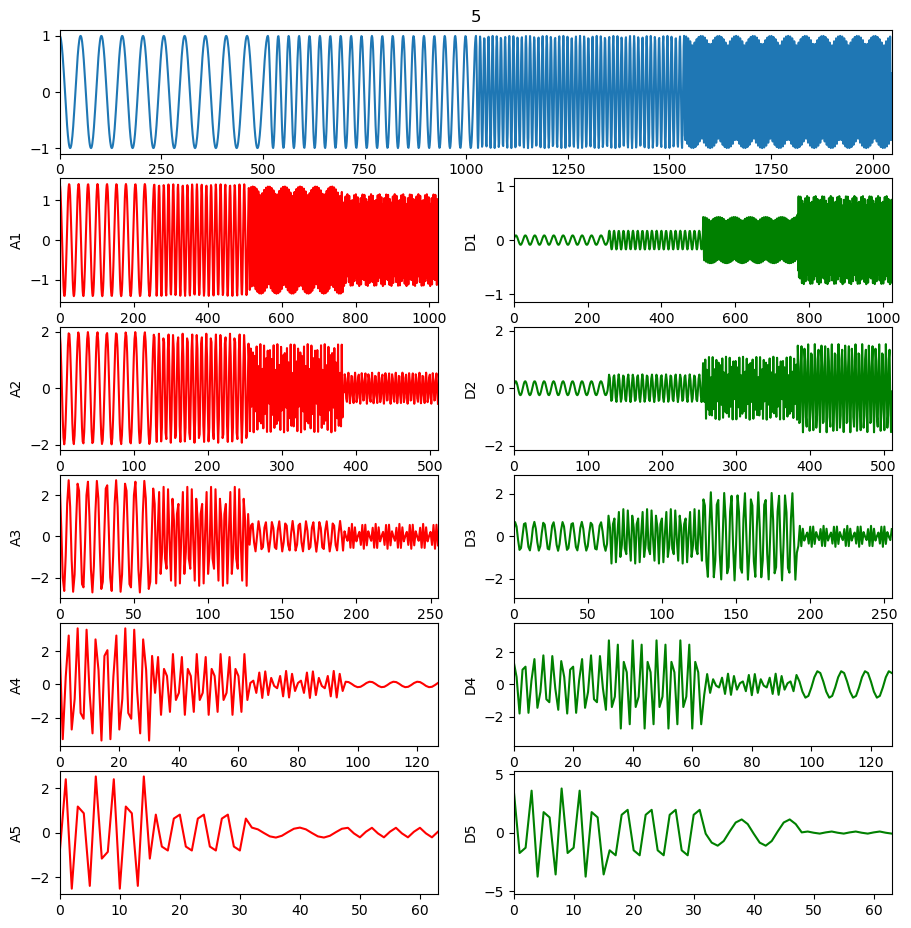

In [22]:
# display the decomposition of x1
# BEGIN SOLUTION
plot_haar_coeffs(x1, 5)
# END SOLUTION

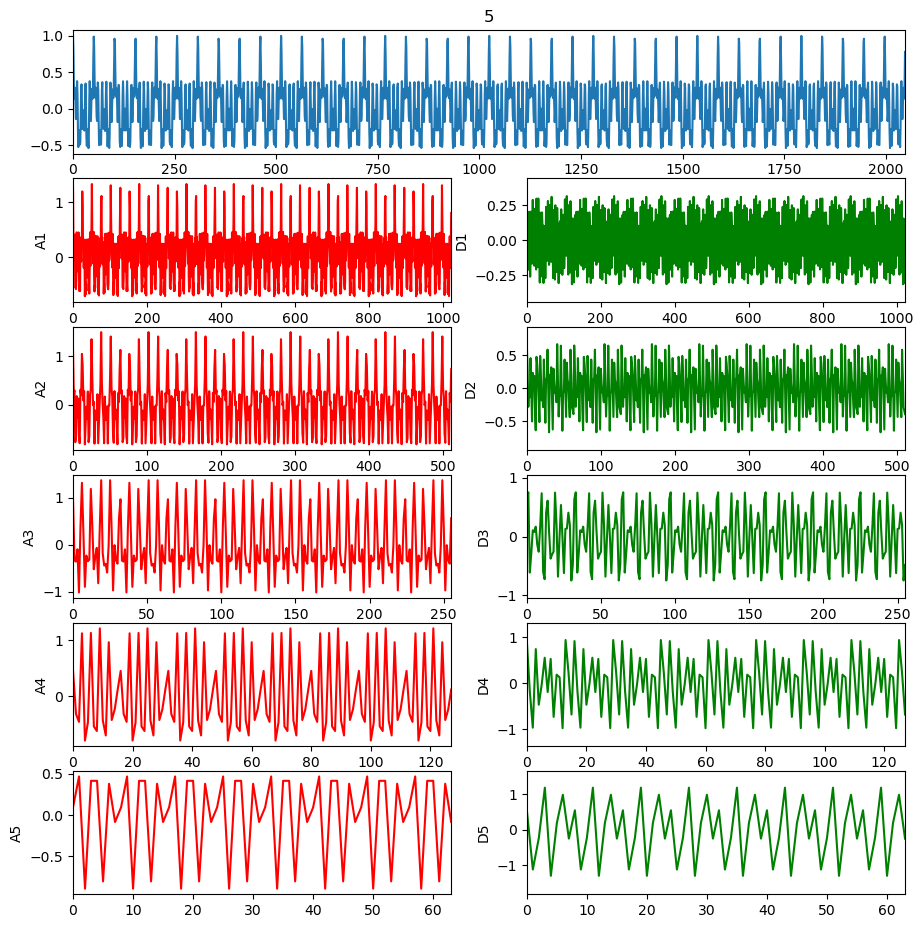

In [23]:
# display the decomposition of x2
# BEGIN SOLUTION
plot_haar_coeffs(x2, 5)
# END SOLUTION

<!-- END QUESTION -->

## Part III - Denoising

We will now use the different transforms defined in part I and II to perform denoising.
Let us create a noisy signal for this purpose.

In [24]:
angle1 = np.linspace(0, 5*np.pi/2, 300)
wave1  = np.sin(angle1)
angle2 = np.linspace(0, 3*np.pi/2, 300)
wave2  = np.sin(angle2)
angle3 = np.linspace(np.pi/2, 2*np.pi, 424)
wave3  = np.sin(angle3)
wave   = np.append(wave1, wave2)
wave   = np.append(wave, wave3)
wave_noisy = wave + 0.2*np.random.normal(0, 1, 1024)

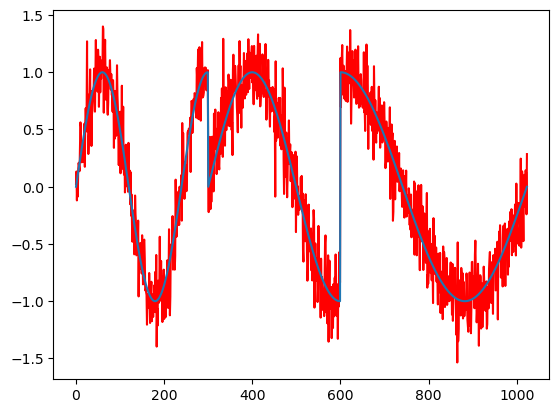

In [25]:
plt.plot(wave_noisy, 'r')
plt.plot(wave)

The noise is usually located in the higher frequencies. However, the signal we created is a bit special as it has two discontinuities which also generate high frequencies components (remember the Fourier transform of a rectangle function is a sinc). 

<!-- BEGIN QUESTION -->

14. Implement a function `denoise_signal` that perform denoising of the input signal by using a supplied orthonormal transform matrix, and by setting the transformed coefficients having an amplitude smaller than a given threshold to 0. You might want to use the [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function for this. When denoising using the Haar transform, you can preform the thresholding only on the detail coefficients. Implement the function `denoise_signal_haar` that performs this operation.

NB: The result returned should be real, in order to be displayed. 

In [26]:
def denoise_signal(W, x, threshold=0.1):
    """
    W: NxN input orthonormal matrix (Fourier, block-Fourier or Haar)
    x: input signal (of length N)
    """
    # BEGIN SOLUTION
    x_tf = W@x
    Winv = np.conj(W.T)
    return np.real(Winv@np.where(np.abs(x_tf)<threshold, 0, x_tf))
    # END SOLUTION

In [27]:
def denoise_signal_haar(W, x, threshold=0.1, detail_start_index=256):
    """
    W: NxN input orthonormal matrix (Fourier, block-Fourier or Haar)
    x: input signal (of length N)
    detail_start_index: thresholding is performed on x[detail_start_index:]
    """
    # BEGIN SOLUTION
    x_tf = W@x
    Winv = W.T
    x_dn = x_tf
    x_dn[detail_start_index:] = np.where(np.abs(x_tf[detail_start_index:])<threshold, 0, x_tf[detail_start_index:])
    return Winv@x_dn
    # END SOLUTION

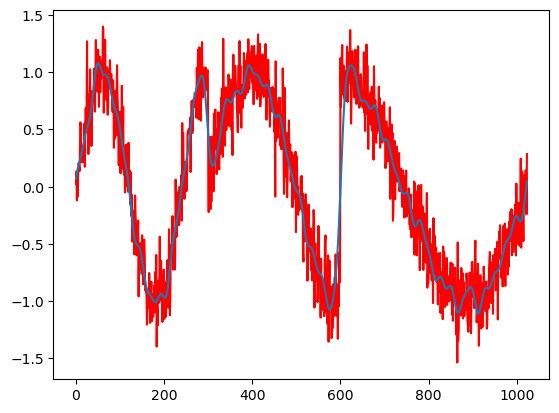

In [28]:
# Perform denoising with the full Fourier transform and display the result. 
# Make sure you choose a good threshold
# BEGIN SOLUTION
waverec_fourier = denoise_signal(get_fourier_matrix(len(wave_noisy)), wave_noisy, 0.55)
plt.plot(wave_noisy, 'r')
plt.plot(waverec_fourier)
# END SOLUTION

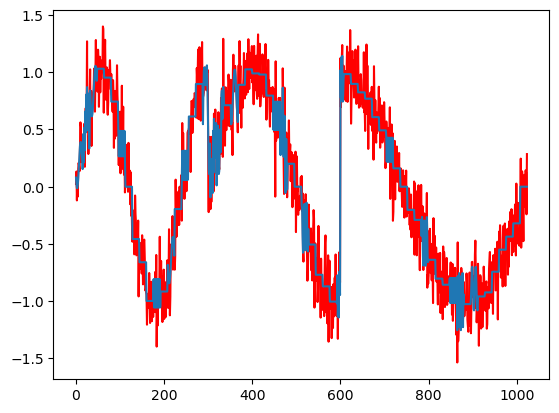

In [29]:
# Perform denoising with the block Fourier transform and display the result
# Make sure you choose a good threshold and block size
# BEGIN SOLUTION
waverec_block_fourier = denoise_signal(get_block_dft_matrix(len(wave_noisy), 16), wave_noisy, 0.4)
plt.plot(wave_noisy, 'r')
plt.plot(waverec_block_fourier)
# END SOLUTION

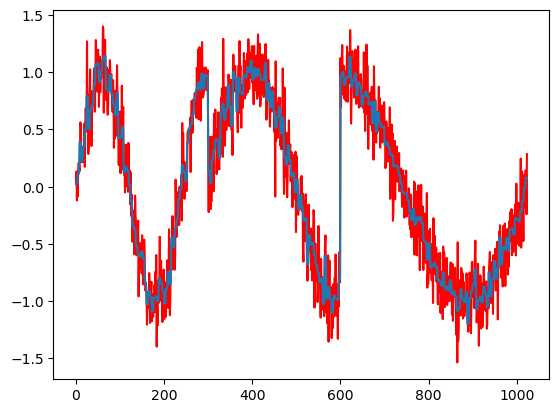

In [30]:
# Perform denoising with the Haar transform and display the result
# Make sure you choose a good threshold and an appropriate number of levels
# BEGIN SOLUTION
waverec_haar = denoise_signal_haar(get_haar_matrix(len(wave_noisy), 5), wave_noisy, 0.9, 256)
plt.plot(wave_noisy, 'r')
plt.plot(waverec_haar)
# END SOLUTION

In [31]:
grader.check("q14")

q14 results: All test cases passed!
q14 - 1 message: Good, not denoising the noisy signal does not modify it.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

15. Compare the three denoising methods (Fourier, block Fourier and Haar). Which one performs better (in terms of noise removal but also in terms of discontinuity preservation) ? Was that expected (justify) ?

We see quite different results in terms of output. The full Fourier transform generates a cleaner denoised signal, however it also smoothes out the discontinuties, which might not be desireable (if you think of the 2D version applied to an image with sharp contours, they would be blurred out). Block DFT and Haar preserve discontinuities better but our very simple denoising method introduces also undesirable artifacts in the block DFT version, while Haar yields better results (good noise removal and discontinuity preservation). The Haar details coefficients are computed using only few neighboring samples, unlike high frequency Fourier coefficients. This helps in preserving the discontinuities when denoising. 

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Upload your notebook and separate pdf for theoretical questions if needed

In [32]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q4 results: All test cases passed!
    q4 - 1 message: Good, your implementation returns correct results
    q4 - 2 message: Good, you did not use the scipy.linalg.dft function
    q4 - 3 message: Good, you did not use the scipy.fft.fft function
    q4 - 4 message: Good, you did not use the numpy.fft.fft function
    q4 - 5 message: Good, your implementation returns an orthogonal matrix
    q4 - 6 message: Good, you properly validated size before computing the result

    q6 results: All test cases passed!
    q6 - 1 message: Good, your implementation returns an orthogonal matrix
    q6 - 2 message: Good, you properly validated size before computing the result
    q6 - 3 message: Good, your implementation returns the correct result

    q10 results: All test cases passed!
    q10 - 1 message: Good, you properly validated size before computing 